In [1]:
from numpy.lib import median
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Carga da Base

In [2]:
df_total = pd.DataFrame()
id_pessoa = 0
for i in os.listdir('normalizacao/'):
    df = pd.read_excel(f"normalizacao/{i}",header=None)
    df['Nome'] = id_pessoa
    id_pessoa += 1
    #df['Nome'] = i.split('-')[1].split('.')[0]
    df_total = pd.concat([df,df_total])
df_total = df_total.rename(columns={1:'Qtd Total Pontos',2:'Qtd Dados'})

In [3]:
df_total['Fadiga'] = [0 if x == 'Normal' else 1 for x in df_total[0]]
df_total

,0,Qtd Total Pontos,Qtd Dados,3,4,5,6,7,8,9,...,6998,6999,7000,7001,7002,7003,7004,7005,7006,Fadiga
0,Normal,250,249,617.690186,617.679871,617.748291,617.704529,617.624207,617.557251,617.412354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Normal,206,206,905.522034,905.256958,905.053467,904.930481,904.830872,904.792175,904.865112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Erro na Coleta,1290,689,599.337158,603.076416,606.548157,609.216492,610.949463,611.528442,611.240906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Erro na Coleta,120,99,750.602417,749.031067,747.358887,745.603943,743.997986,742.309265,740.471191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Erro na Coleta,277,92,624.175659,624.377319,624.488586,624.601196,624.832397,625.039429,625.369690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Normal,177,175,585.330566,585.392761,585.384583,585.461975,585.557800,585.493591,585.342041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
167,Normal,226,225,869.773010,869.624756,869.500549,869.216614,869.062622,868.875000,868.664856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
168,Normal,212,212,586.307861,586.316895,586.388367,586.399536,586.374939,586.223206,586.212463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
169,Normal,200,200,862.808289,863.046753,863.196655,863.211609,863.170715,863.205017,863.242798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


[Text(0, 0, '7331'),
 Text(0, 0, '58'),
 Text(0, 0, '79'),
 Text(0, 0, '70'),
 Text(0, 0, '6'),
 Text(0, 0, '333'),
 Text(0, 0, '589'),
 Text(0, 0, '1'),
 Text(0, 0, '13'),
 Text(0, 0, '19'),
 Text(0, 0, '14'),
 Text(0, 0, '25')]

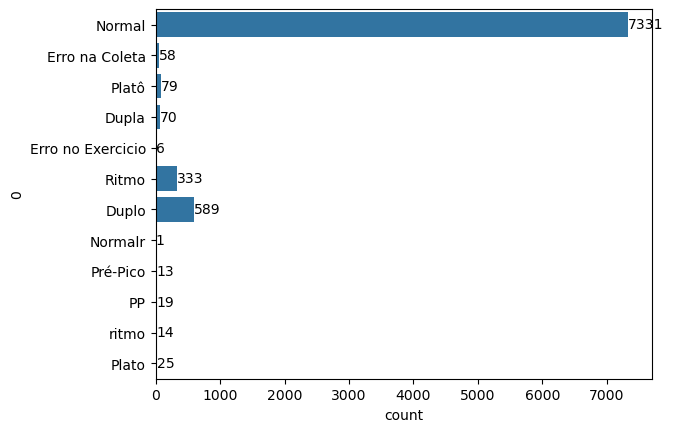

In [4]:
ax = sns.countplot(y=df_total[0])
ax.bar_label(ax.containers[0])

<Axes: xlabel='count', ylabel='Nome'>

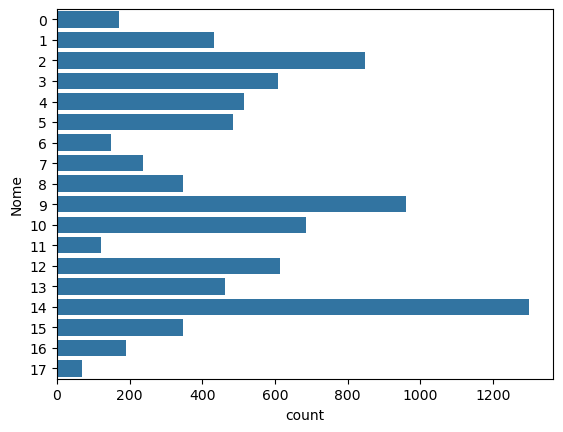

In [5]:
sns.countplot(y=df_total['Nome'])

## Quantidade de dados de cada Subida/Descida

In [6]:
df_total['%De N Vazios'] = df_total['Qtd Dados'] / df_total['Qtd Total Pontos']

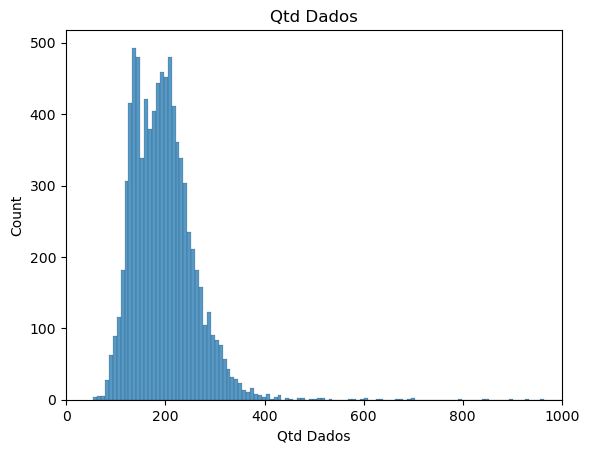

In [7]:
fig, ax = plt.subplots()
sns.histplot(x='Qtd Dados',data=df_total)
ax.set_xlim(-1, 1000)
plt.title('Qtd Dados')
plt.show()

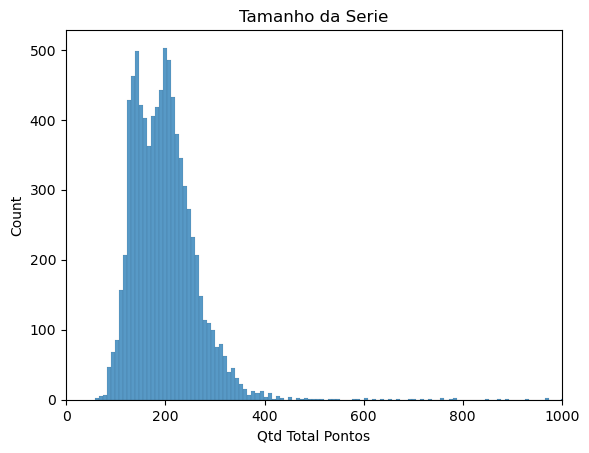

In [8]:
fig, ax = plt.subplots()
sns.histplot(x='Qtd Total Pontos',data=df_total)
ax.set_xlim(-1, 1000)
plt.title('Tamanho da Serie')
plt.show()

In [9]:
df_total['%De Vazios'] = df_total['Qtd Dados']/ df_total['Qtd Total Pontos']

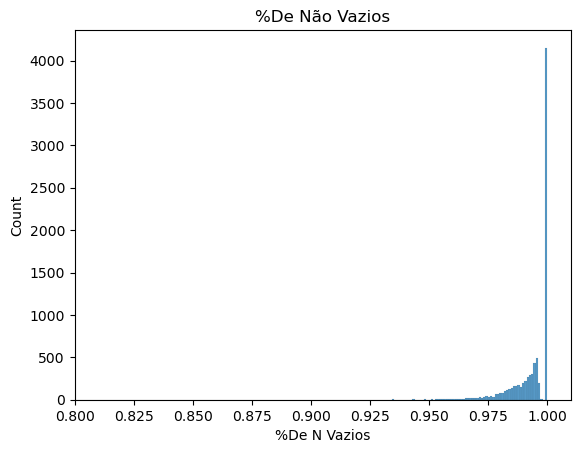

In [10]:
fig, ax = plt.subplots()
sns.histplot(x='%De N Vazios',data=df_total)
ax.set_xlim(0.8,1.01)
plt.title('%De Não Vazios')
plt.show()

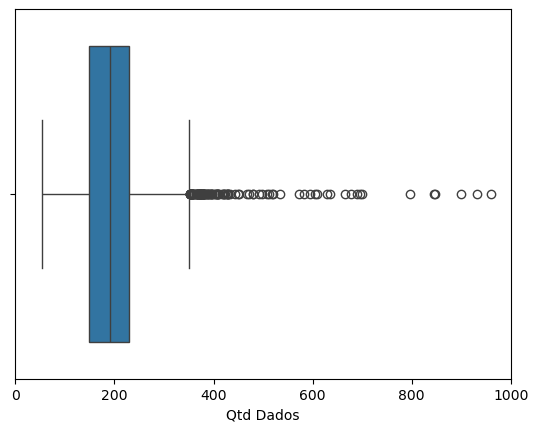

In [11]:
fig, ax = plt.subplots()
sns.boxplot(x='Qtd Dados',data=df_total, ax=ax)
ax.set_xlim(-1, 1000)
plt.show()

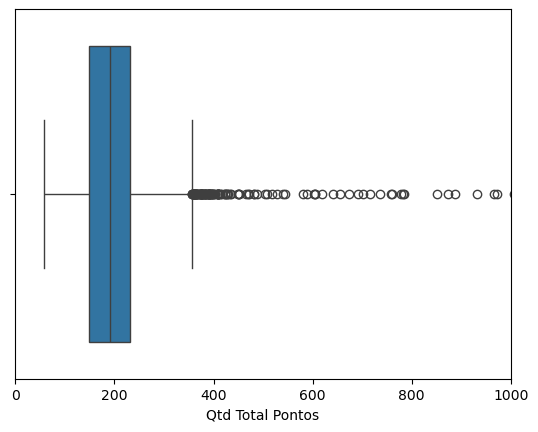

In [12]:
fig, ax = plt.subplots()
sns.boxplot(x='Qtd Total Pontos',data=df_total, ax=ax)
ax.set_xlim(-1, 1000)
plt.show()

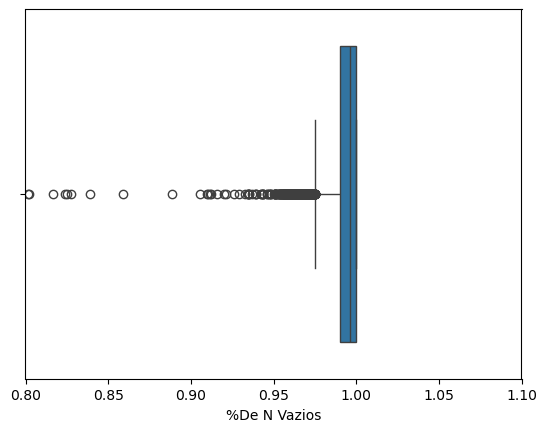

In [13]:
fig, ax = plt.subplots()
sns.boxplot(x='%De N Vazios',data=df_total, ax=ax)
ax.set_xlim(0.8,1.1)
plt.show()

In [14]:
df_total['%De N Vazios'][df_total['%De N Vazios'] < 0.85].count()

45

In [15]:
df_total['%De N Vazios'][(df_total['%De N Vazios'] < 0.85) & (df_total[0] != 'Erro na Coleta')].count()

22

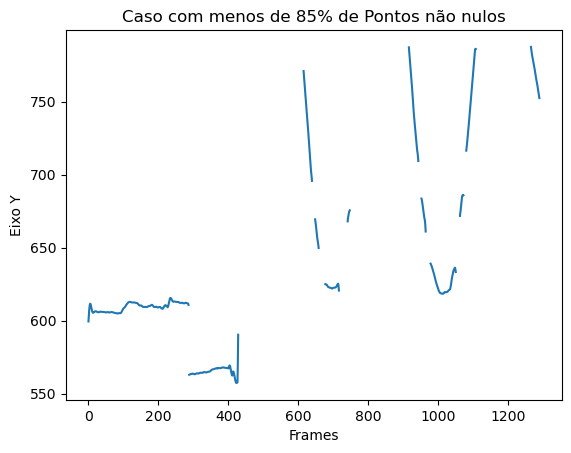

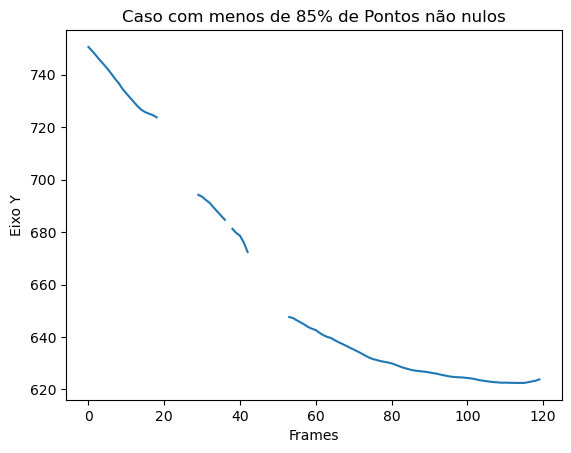

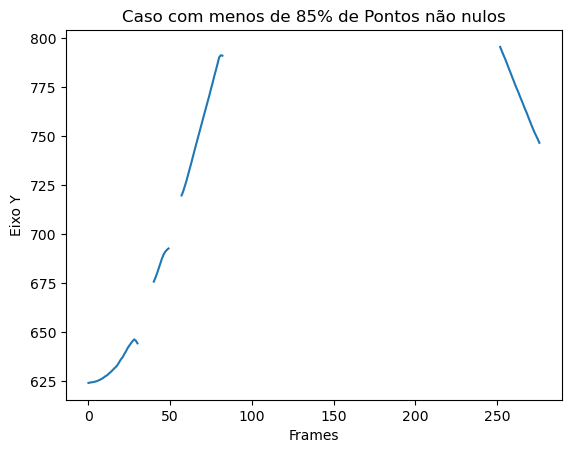

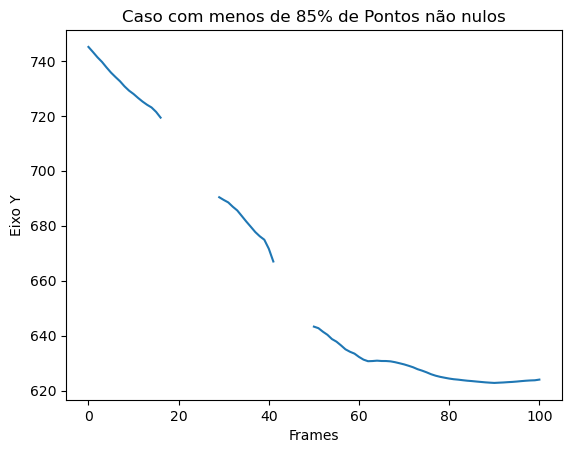

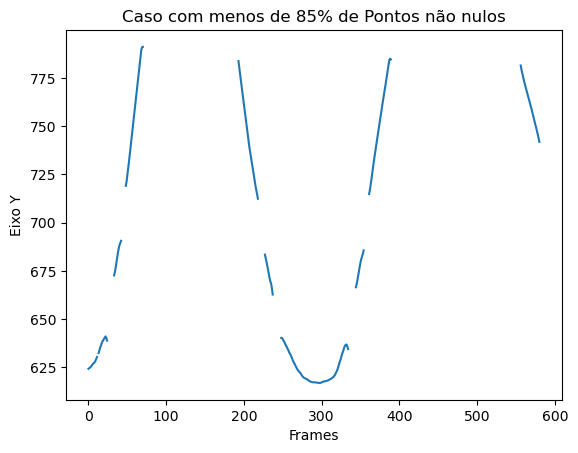

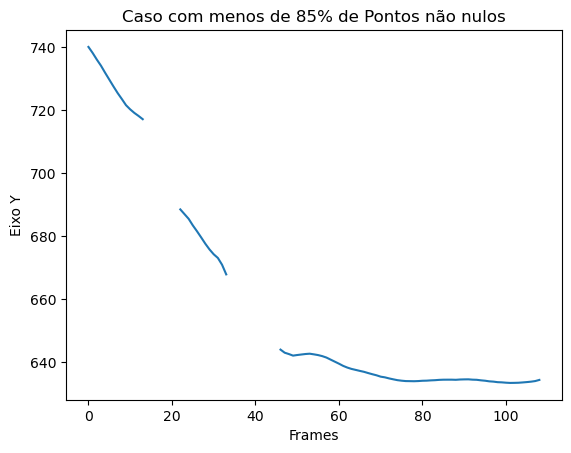

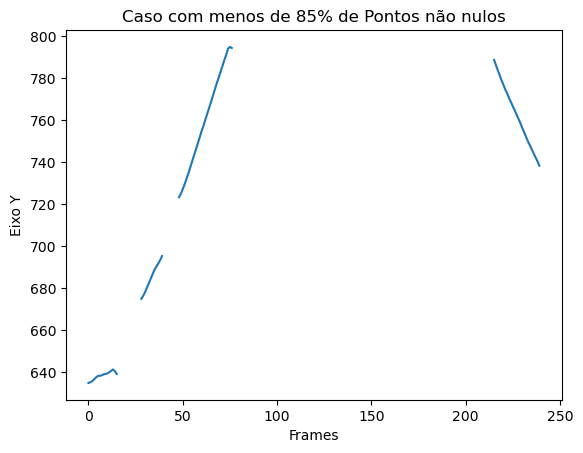

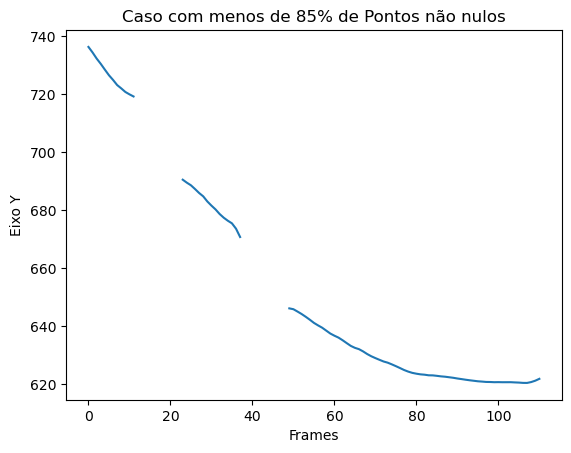

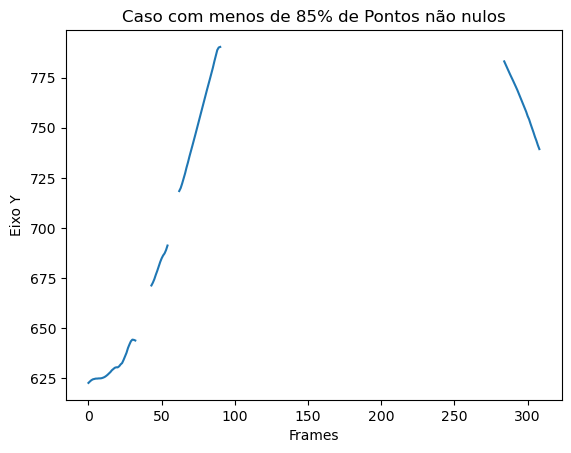

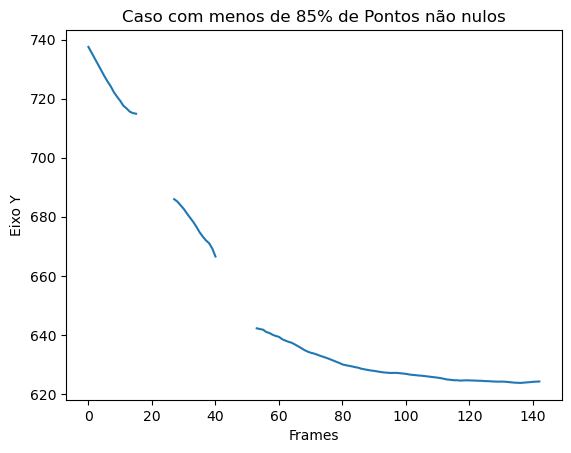

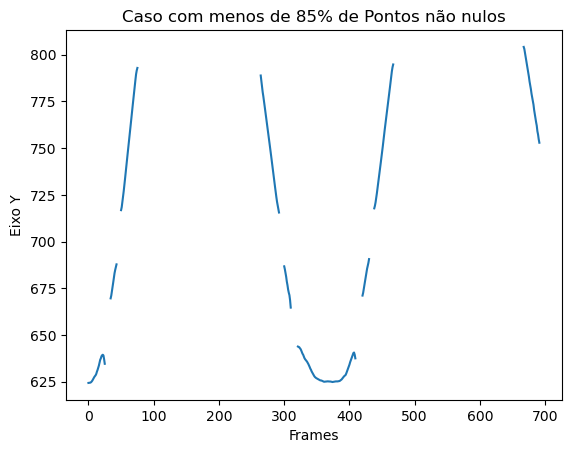

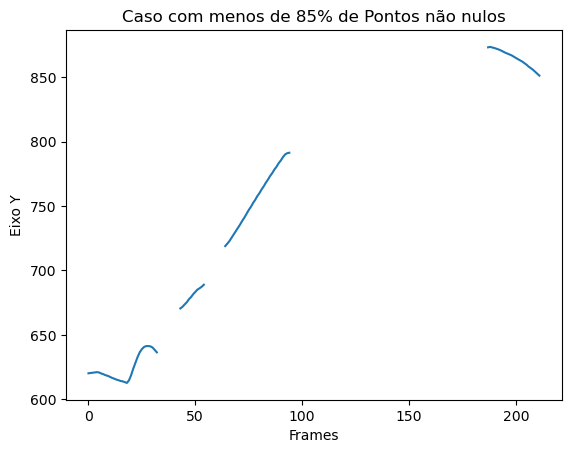

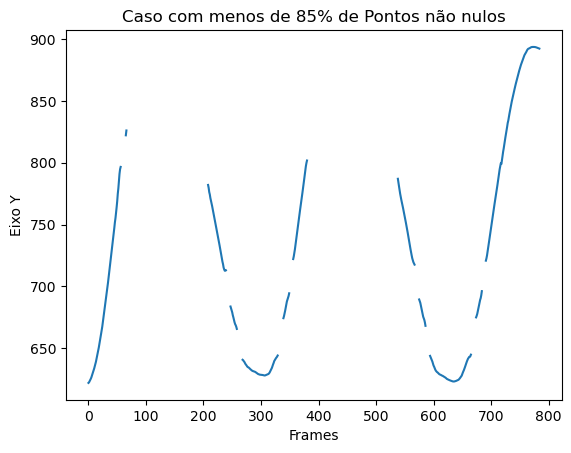

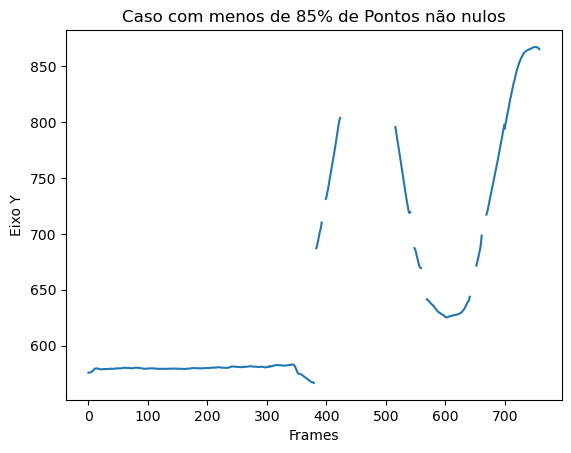

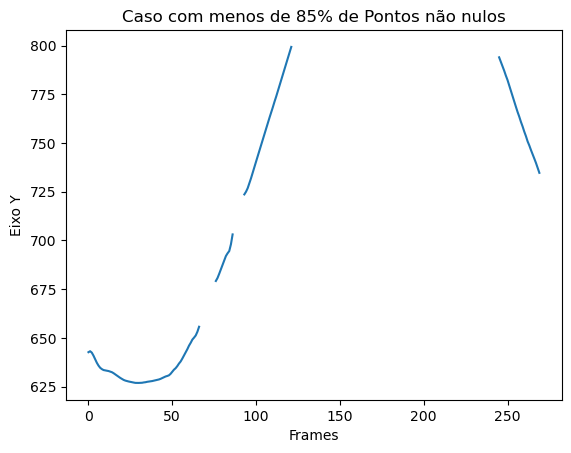

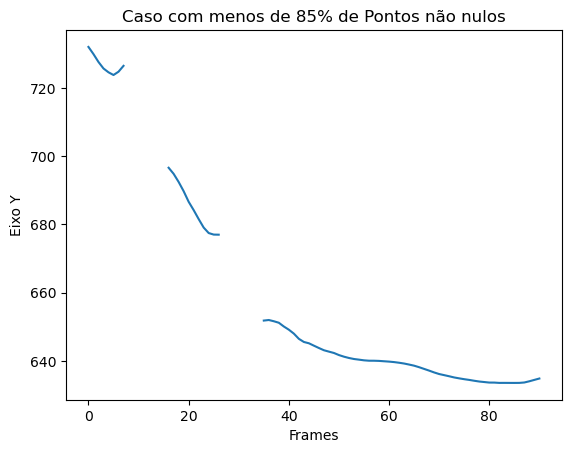

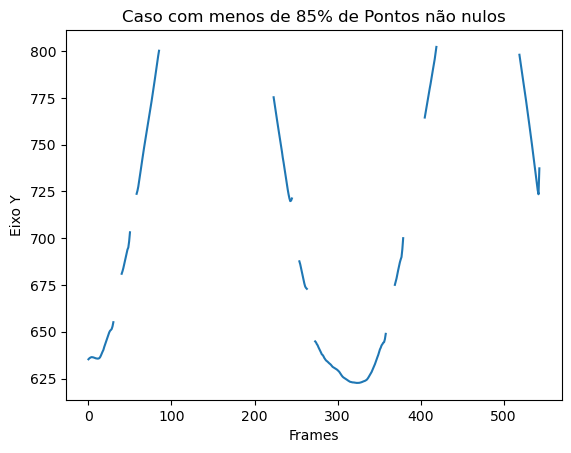

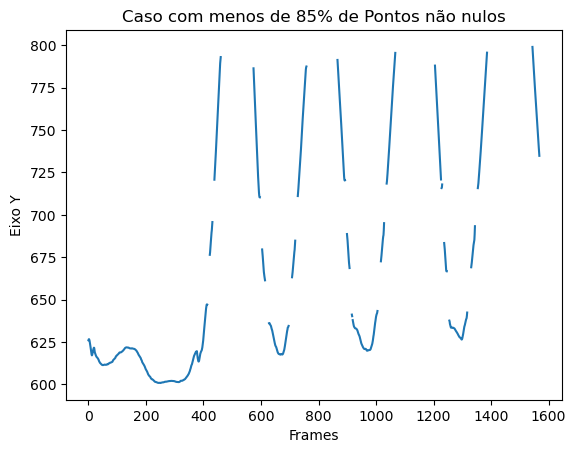

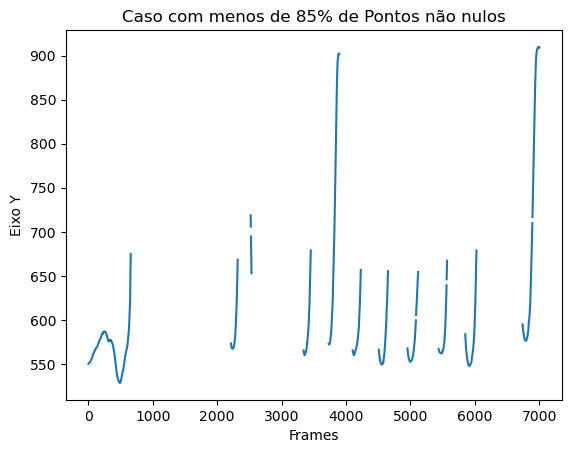

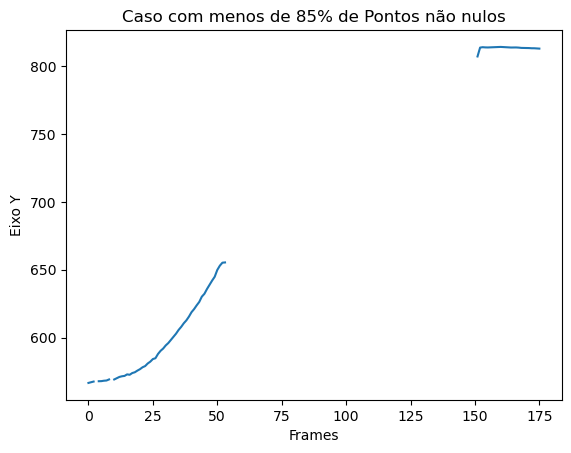

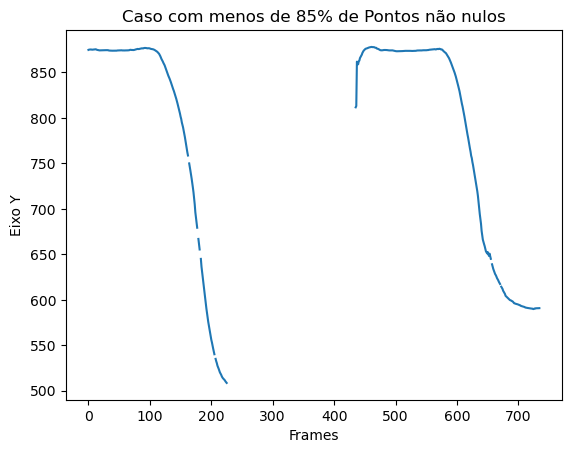

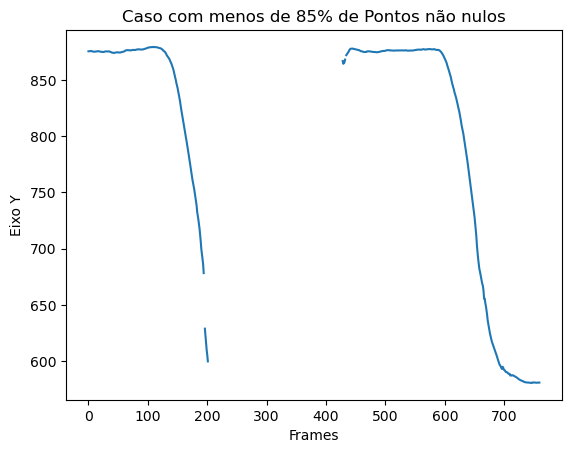

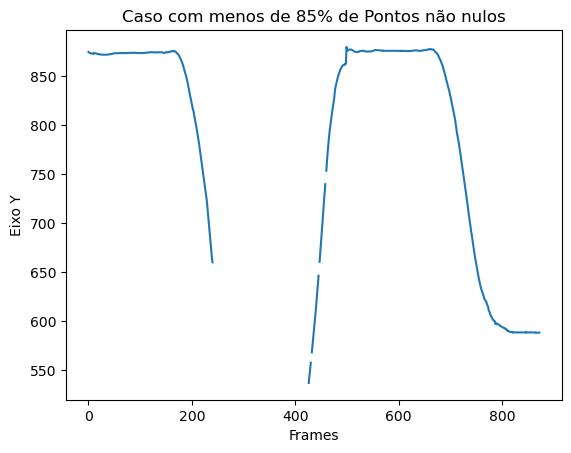

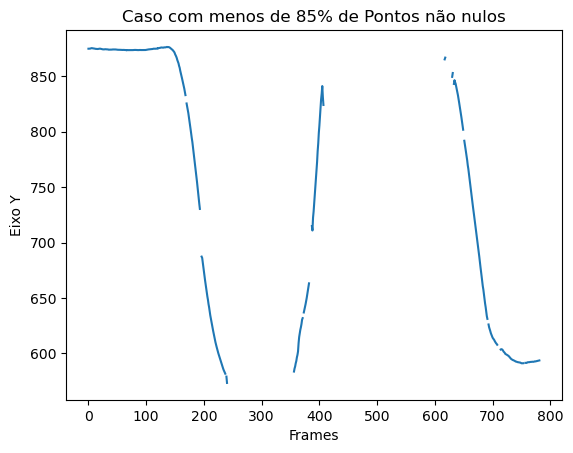

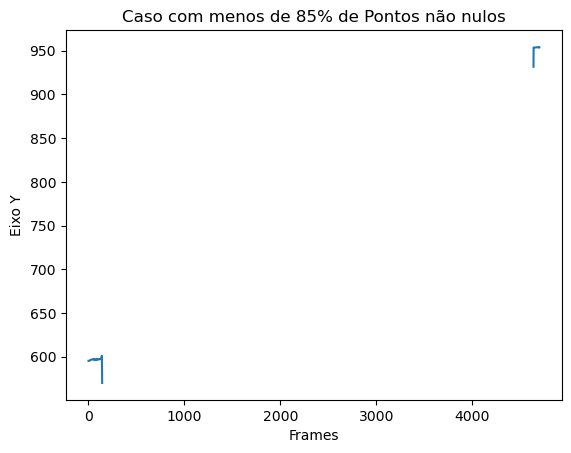

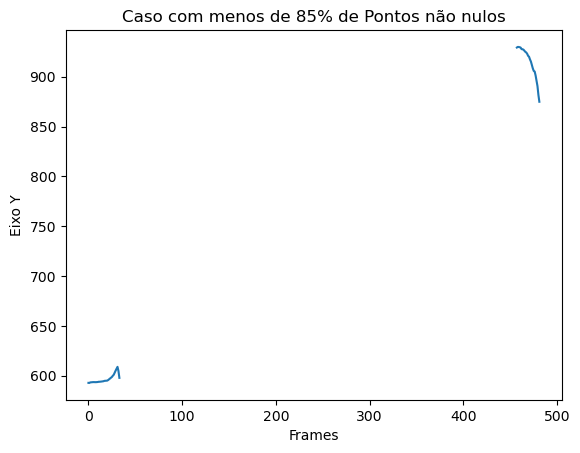

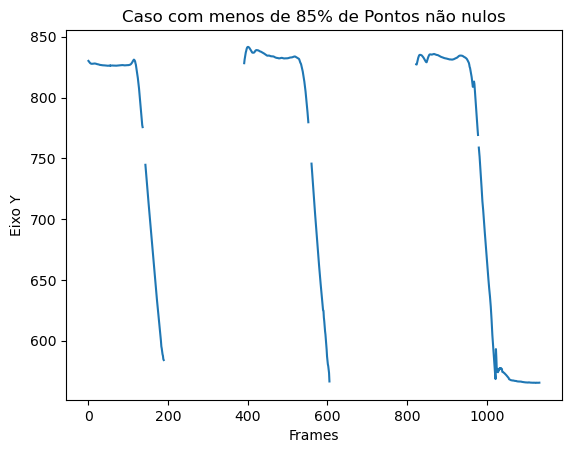

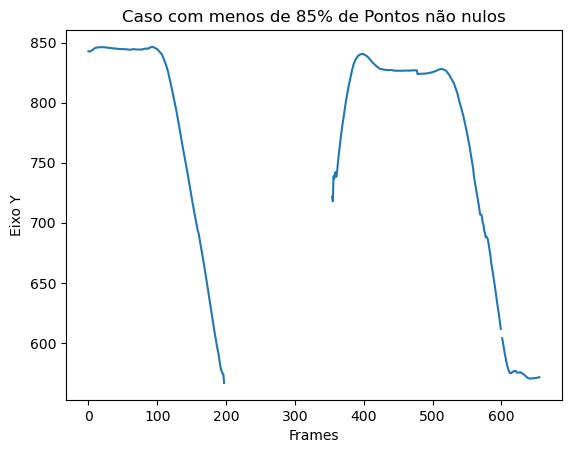

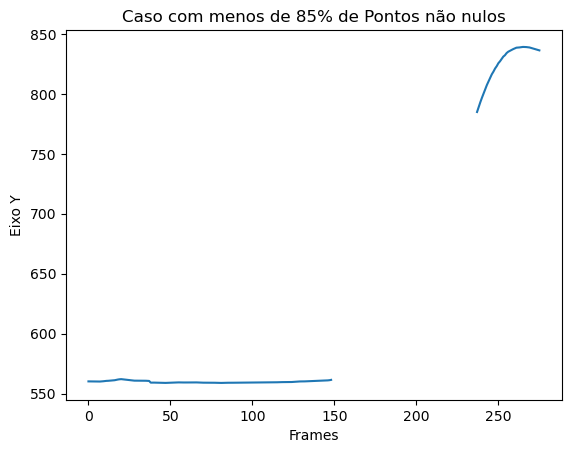

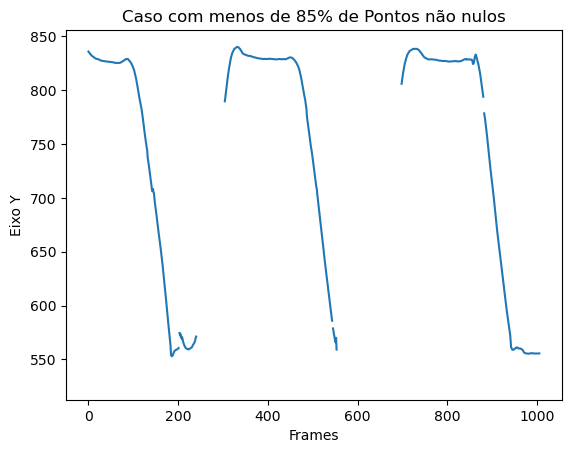

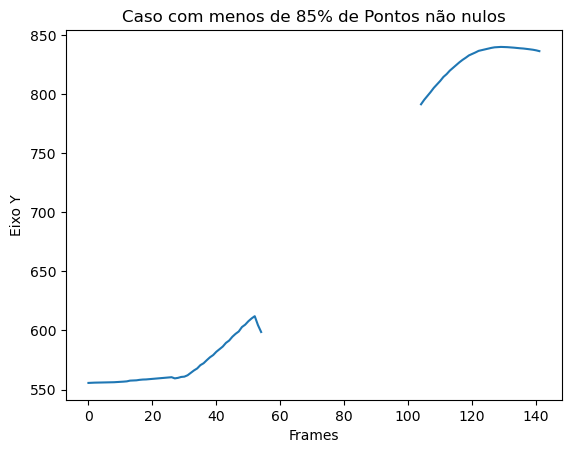

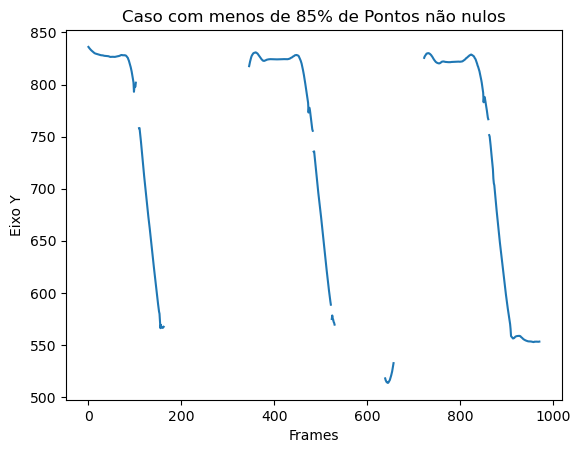

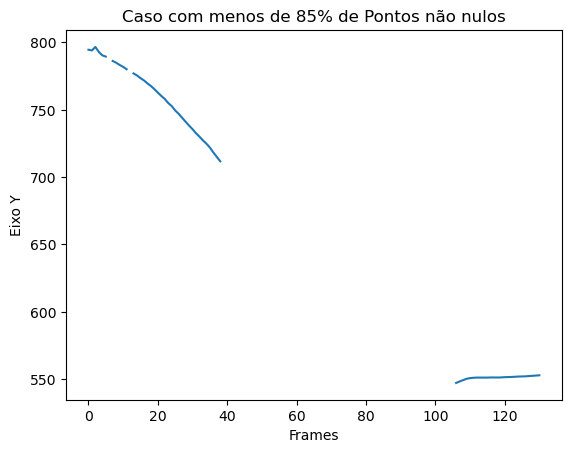

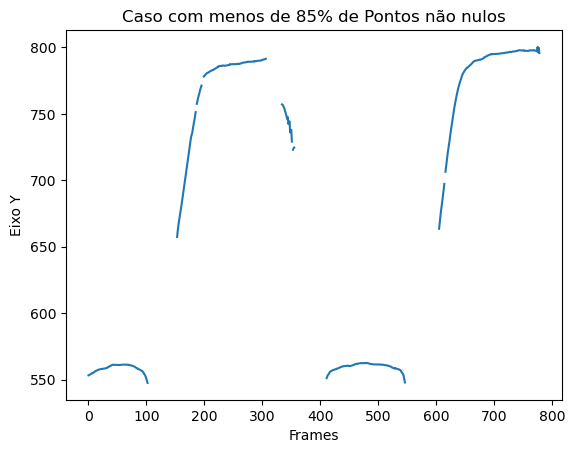

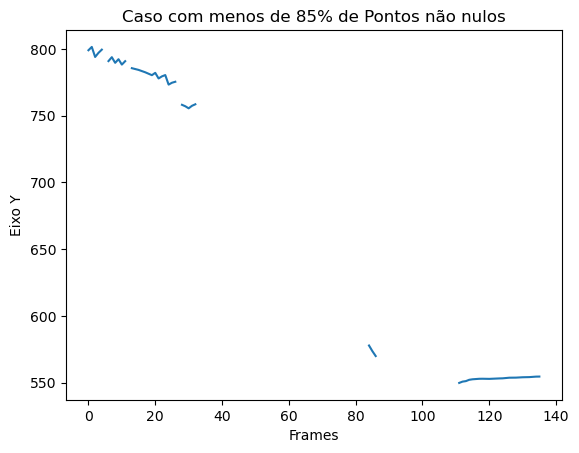

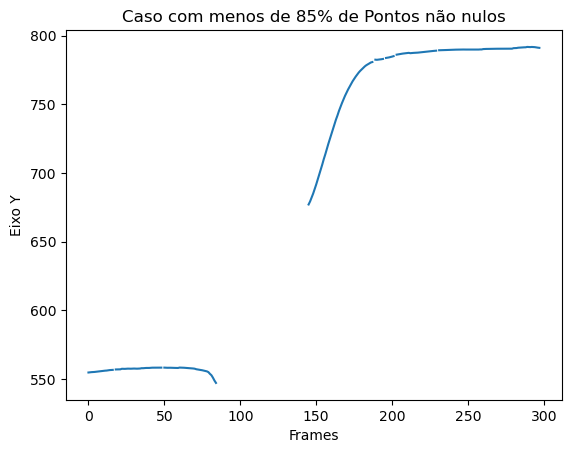

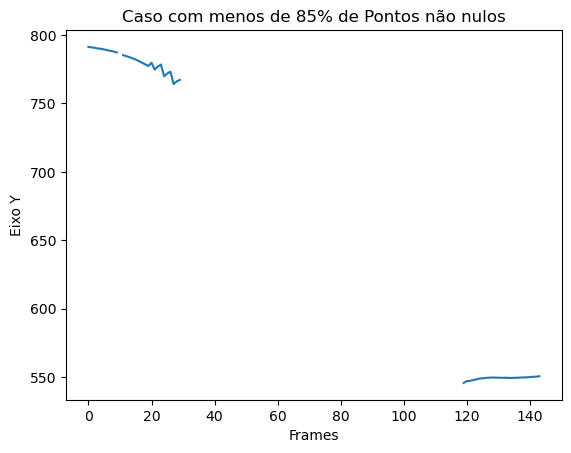

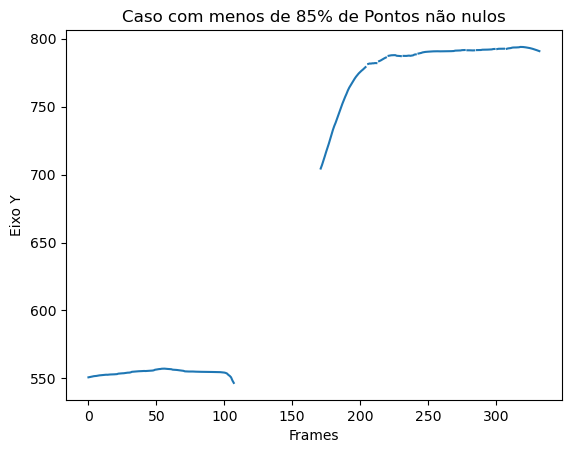

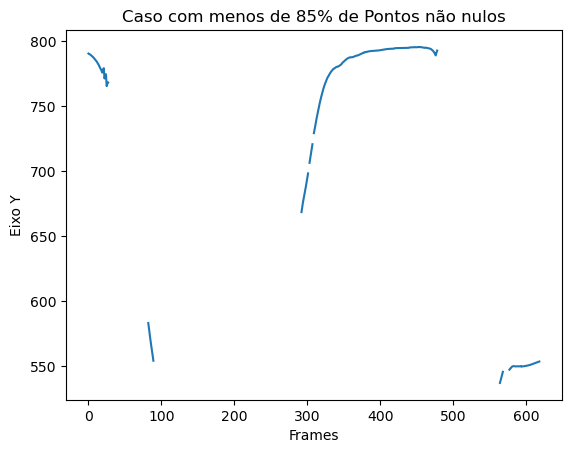

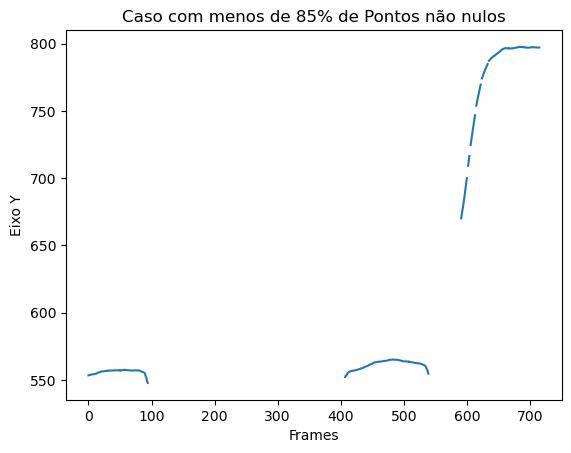

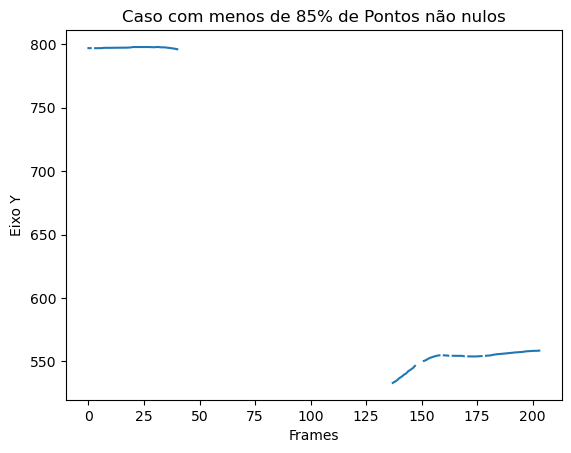

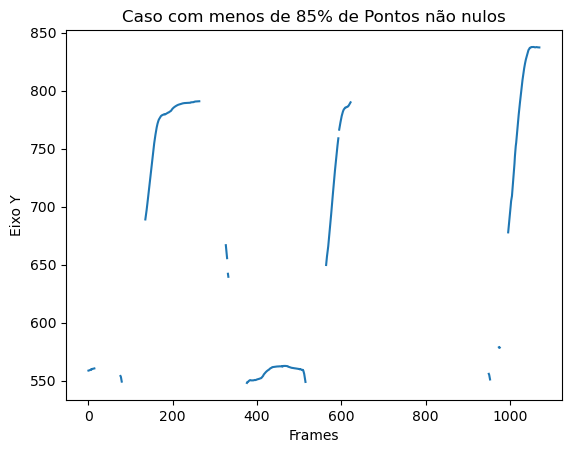

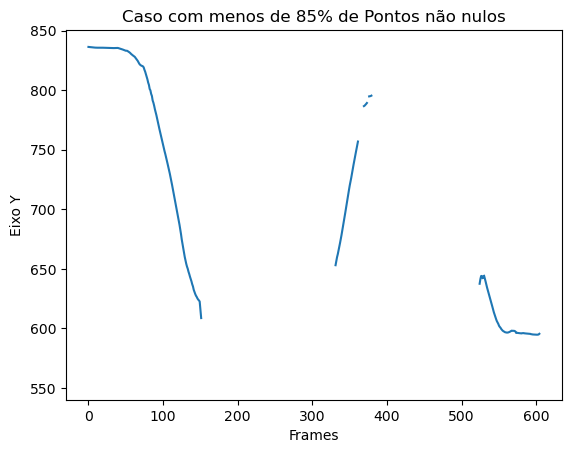

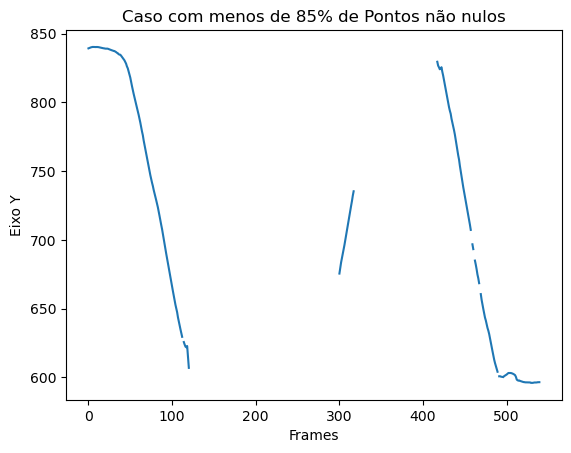

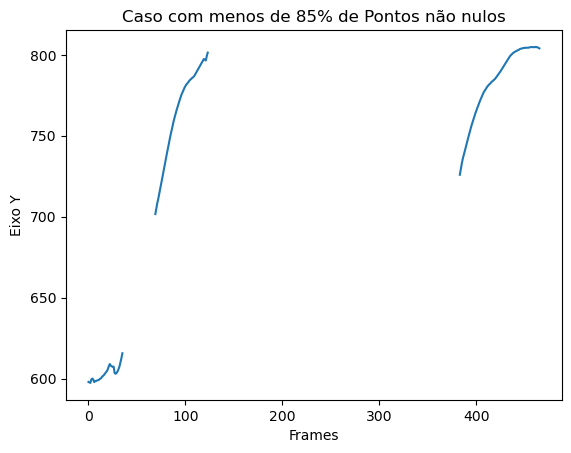

In [16]:
porcentagem = 0.85
nome = df_total[df_total['%De N Vazios'] < porcentagem]['Nome'].to_numpy()
anot = df_total[df_total['%De N Vazios'] < porcentagem][0].to_numpy()
dados = df_total[df_total['%De N Vazios'] < porcentagem]['Qtd Dados'].to_numpy()
pontos = df_total[df_total['%De N Vazios'] < porcentagem]['Qtd Total Pontos'].to_numpy()
count = 0
for x in df_total[df_total['%De N Vazios'] < porcentagem].drop([0,'Nome','Qtd Dados','Qtd Total Pontos','%De N Vazios','Fadiga'],axis = 1).to_numpy():
    fig, ax = plt.subplots()
    ax.plot(x[:pontos[count]])
    ax.set_xlabel('Frames')
    ax.set_ylabel('Eixo Y')
    plt.title('Caso com menos de 85% de Pontos não nulos')
    count += 1
    plt.show()

## Primeira Filtragem

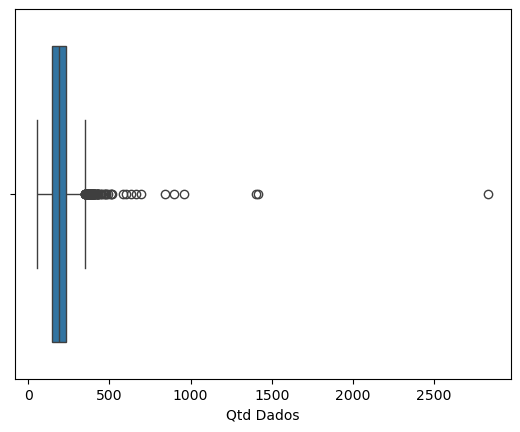

In [17]:
df_filtrado = df_total[(df_total['%De N Vazios'] > 0.85) & (df_total[0] != 'Erro na Coleta')]# & (df_total['Qtd Total Pontos'] < 500)]

fig, ax = plt.subplots()
sns.boxplot(x='Qtd Dados',data=df_filtrado, ax=ax)
#ax.set_xlim(-1, 2000)
plt.show()

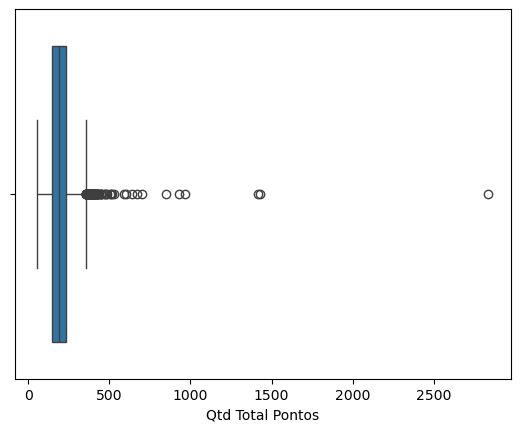

In [18]:
fig, ax = plt.subplots()
sns.boxplot(x='Qtd Total Pontos',data=df_filtrado, ax=ax)
#ax.set_xlim(-1, 1000)
plt.show()

In [19]:
df_filtrado['Qtd Total Pontos'][df_filtrado['Qtd Total Pontos'] > 500].count()

15

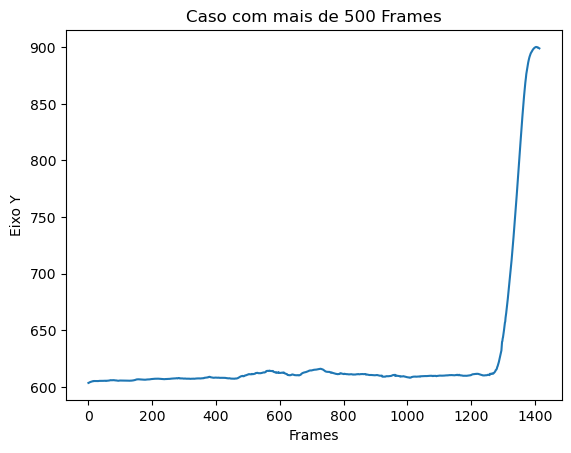

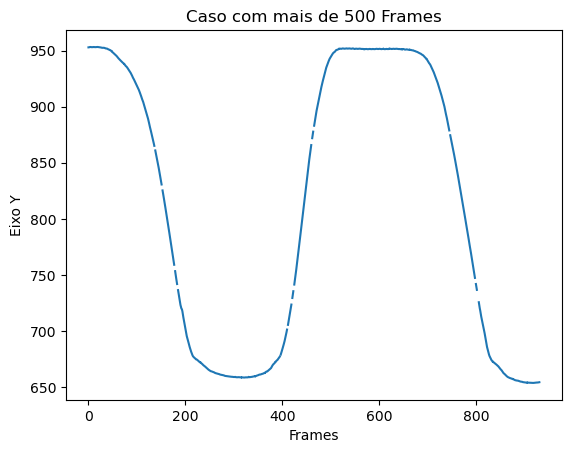

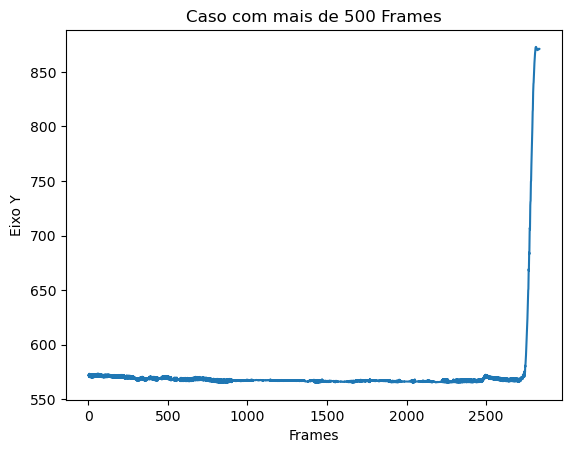

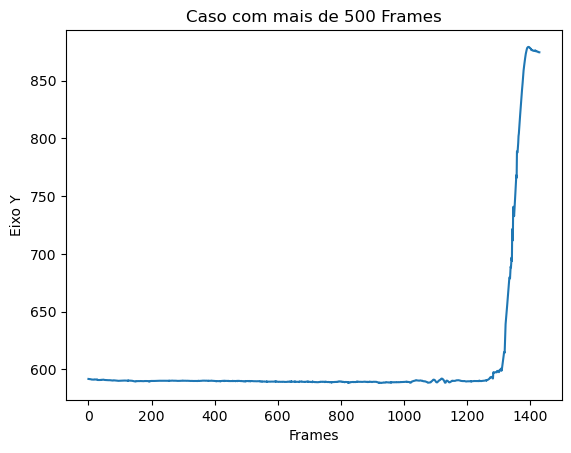

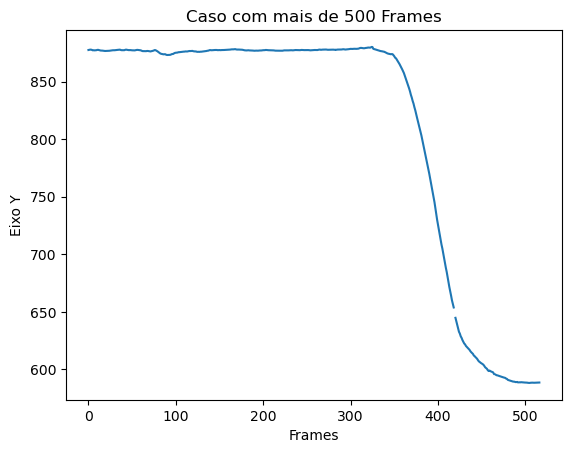

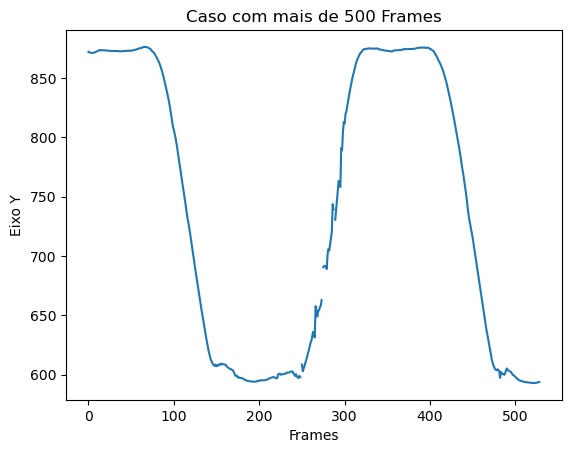

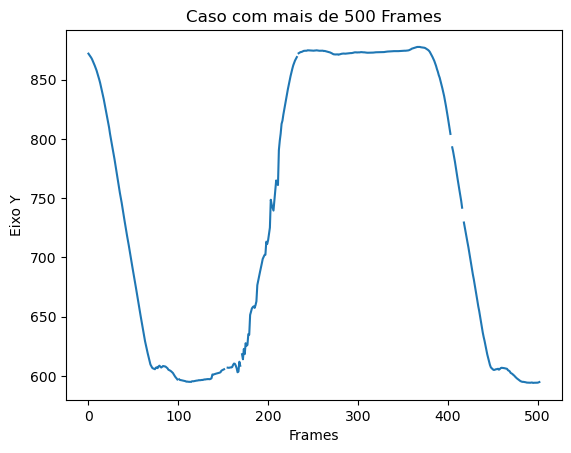

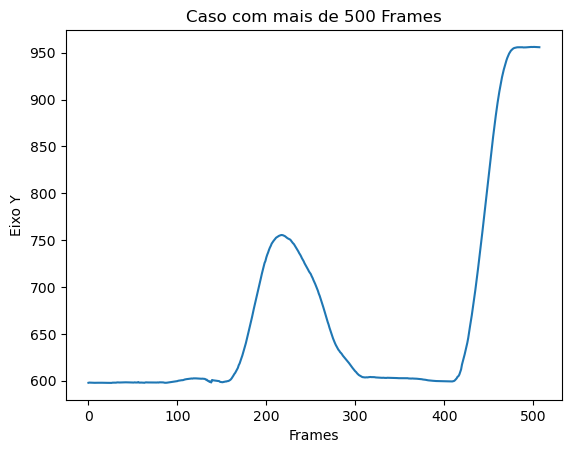

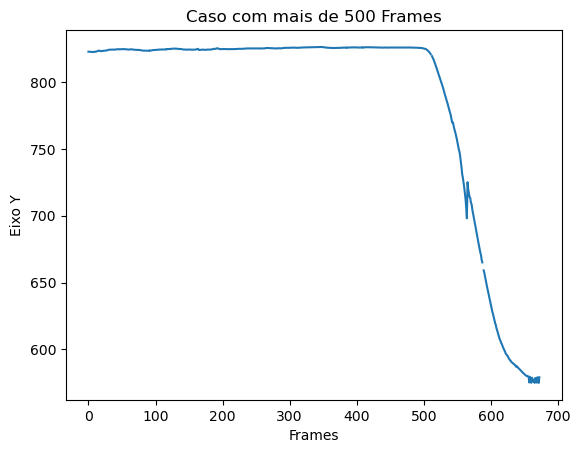

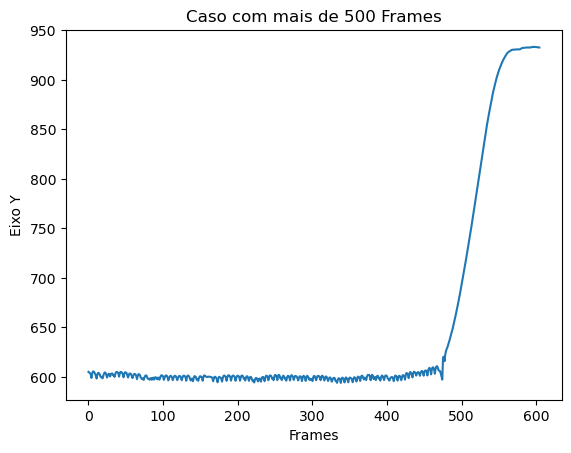

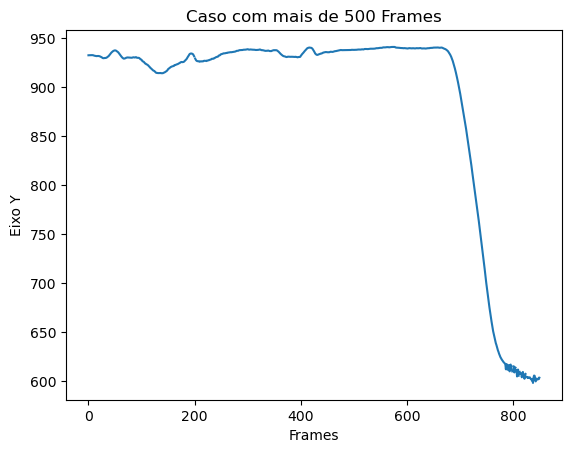

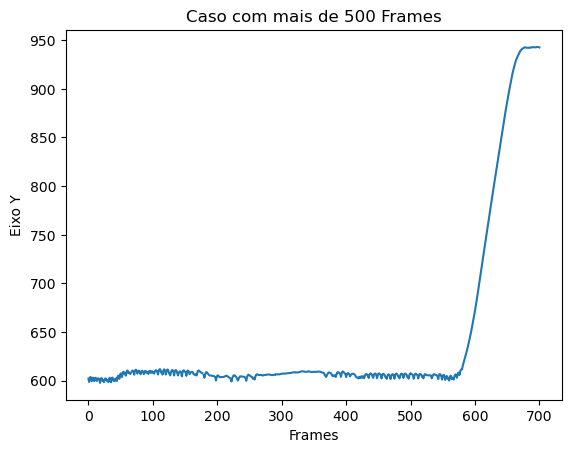

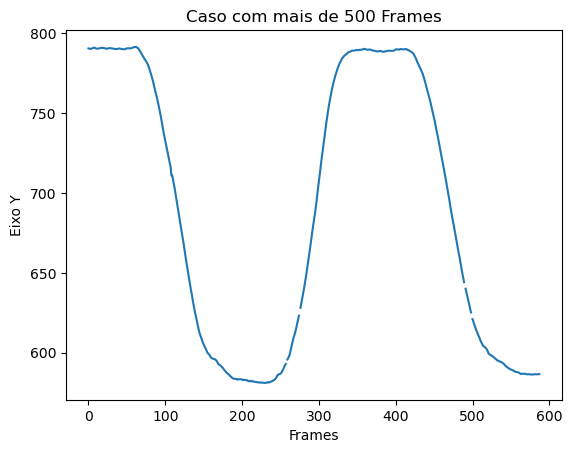

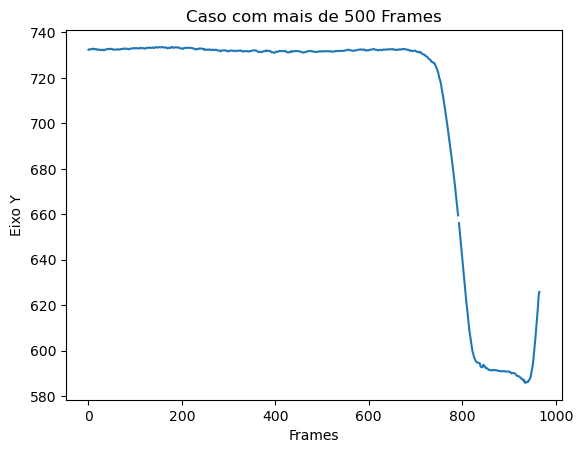

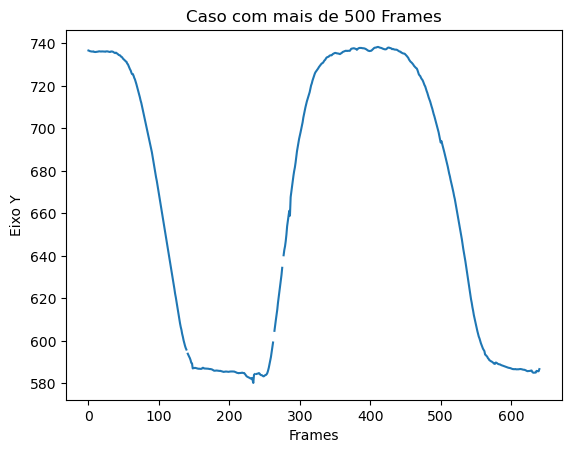

In [20]:
tamanho = 500
nome = df_filtrado[df_filtrado['Qtd Total Pontos'] > tamanho]['Nome'].to_numpy()
anot = df_filtrado[df_filtrado['Qtd Total Pontos'] > tamanho][0].to_numpy()
dados = df_filtrado[df_filtrado['Qtd Total Pontos'] > tamanho]['Qtd Dados'].to_numpy()
pontos = df_filtrado[df_filtrado['Qtd Total Pontos'] > tamanho]['Qtd Total Pontos'].to_numpy()
count = 0
for x in df_filtrado[df_filtrado['Qtd Total Pontos'] > tamanho].drop([0,'Nome','Qtd Dados','Qtd Total Pontos','%De N Vazios','Fadiga'],axis = 1).to_numpy():
    fig, ax = plt.subplots()
    ax.plot(x[:pontos[count]])
    ax.set_xlabel('Frames')
    ax.set_ylabel('Eixo Y')
    plt.title('Caso com mais de 500 Frames')
    count += 1
    plt.show()

## Segunda Filtragem

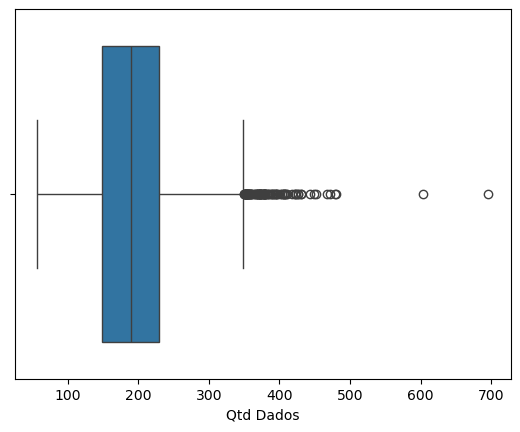

In [21]:
df_filtrado2 = df_total[(df_total['%De N Vazios'] > 0.85) & (df_total[0] != 'Erro na Coleta') & 
    ((df_total['Qtd Total Pontos'] < 500) | (df_total[0] == 'Platô')) & 
    (df_total['Qtd Total Pontos'] < 1000)]

fig, ax = plt.subplots()
sns.boxplot(x='Qtd Dados',data=df_filtrado2, ax=ax)
#ax.set_xlim(-1, 2000)
plt.show()

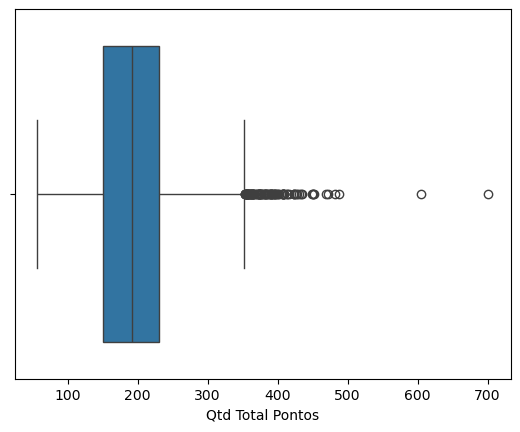

In [22]:
fig, ax = plt.subplots()
sns.boxplot(x='Qtd Total Pontos',data=df_filtrado2, ax=ax)
#ax.set_xlim(-1, 2000)
plt.show()

In [23]:
df_filtrado2['Qtd Total Pontos'][df_filtrado2['Qtd Total Pontos'] <80].count()

9

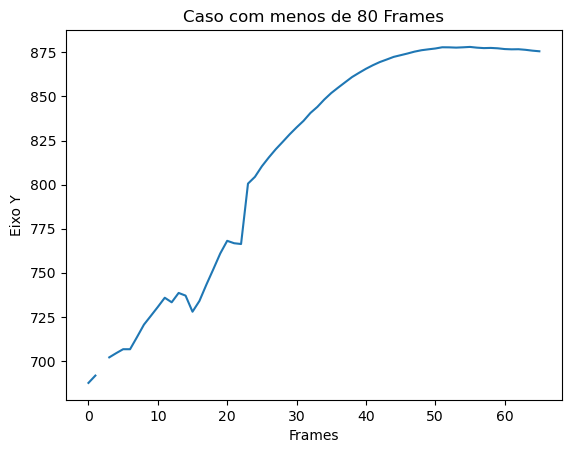

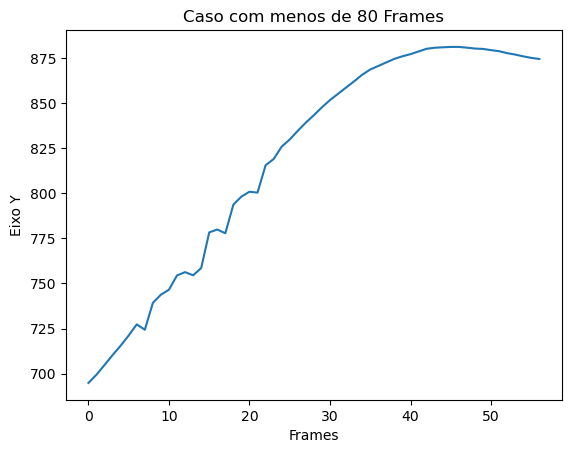

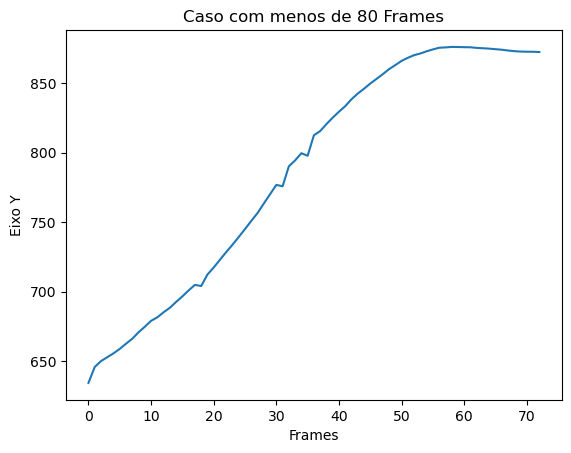

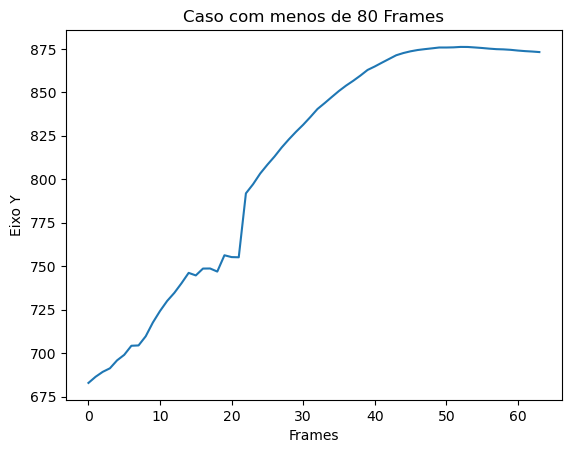

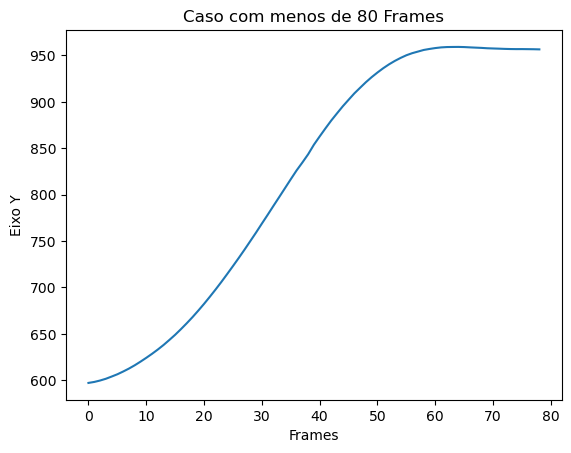

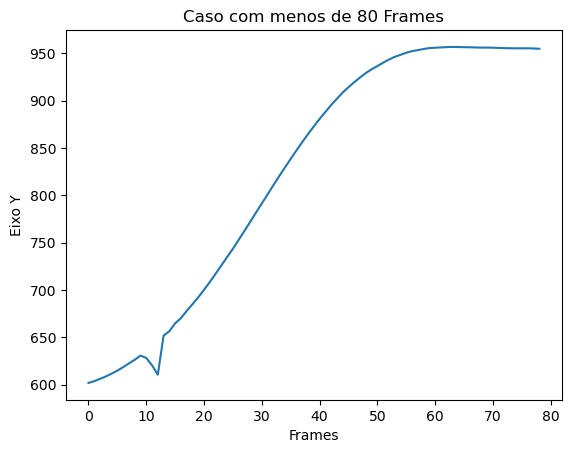

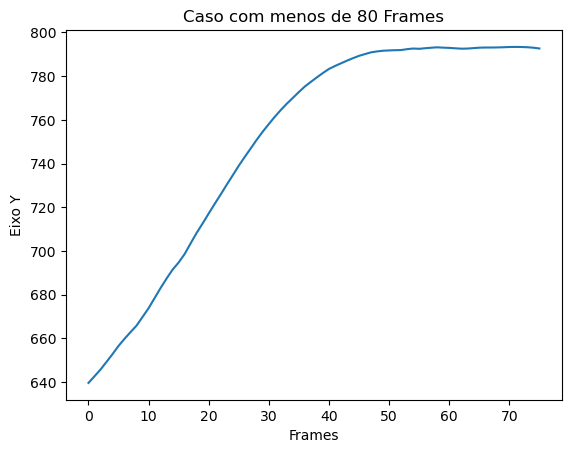

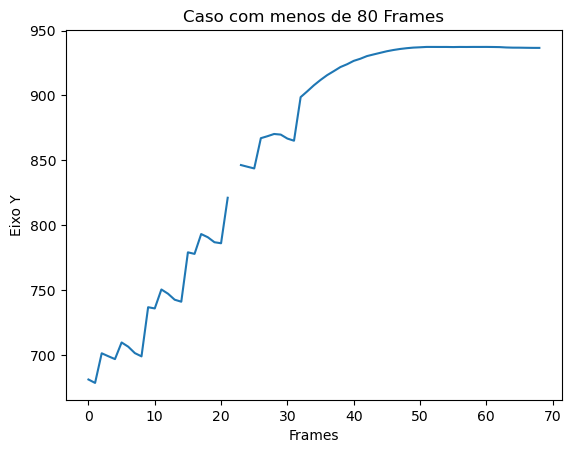

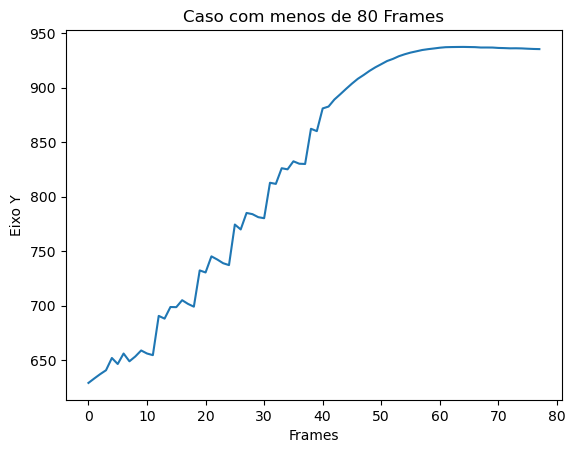

In [24]:
tamanho = 80
nome = df_filtrado2[df_filtrado2['Qtd Total Pontos'] < tamanho]['Nome'].to_numpy()
anot = df_filtrado2[df_filtrado2['Qtd Total Pontos'] < tamanho][0].to_numpy()
dados = df_filtrado2[df_filtrado2['Qtd Total Pontos'] < tamanho]['Qtd Dados'].to_numpy()
pontos = df_filtrado2[df_filtrado2['Qtd Total Pontos'] < tamanho]['Qtd Total Pontos'].to_numpy()
count = 0
for x in df_filtrado2[df_filtrado2['Qtd Total Pontos'] < tamanho].drop([0,'Nome','Qtd Dados','Qtd Total Pontos','%De N Vazios'],axis = 1).to_numpy():
    fig, ax = plt.subplots()
    ax.plot(x[:pontos[count]])
    ax.set_xlabel('Frames')
    ax.set_ylabel('Eixo Y')
    plt.title('Caso com menos de 80 Frames')
    count += 1
    plt.show()